<a href="https://colab.research.google.com/github/AlekseevaTatiana23/AlekseevaTatiana23.github.io/blob/main/HT9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

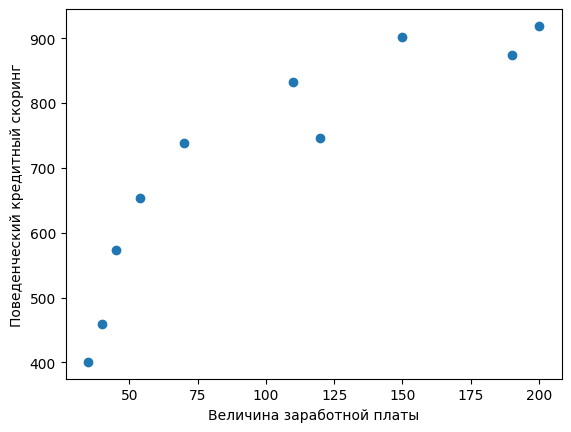

In [25]:
import numpy as np
import matplotlib.pyplot as plt

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

plt.scatter(zp,ks)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()


In [24]:
n=len(zp)

b1=(np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
b1

2.620538882402765

In [6]:
b0=np.mean(ks)-b1*np.mean(zp)
b0

444.17735732435955

In [9]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

zp=zp.reshape(-1,1)
regres=model.fit(zp, ks)
print(f'Интерсепт = {regres.intercept_}')
print(f'Коэффициент = {regres.coef_}')

Интерсепт = 444.1773573243595
Коэффициент = [2.62053888]


И линейную взаимосвязь между заработной платой и кредитным скорингом можно описать функцией:
ks=444.18+2.62*zp
Отобразим результаты на графике:

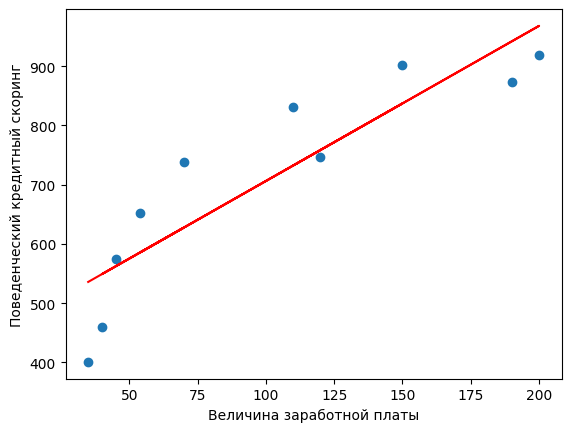

In [26]:
y_pred=444.18+2.62*zp
plt.scatter(zp, ks)
plt.plot(zp, y_pred, c='r')
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг')
plt.show()

Матричный метод

In [36]:
ks=ks.reshape((-1,1))
ks

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [37]:
zp=zp.reshape((-1,1))
zp=np.hstack([np.ones((len(zp),1)),zp])
zp

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [38]:
B=np.dot(np.linalg.inv(np.dot(zp.T,zp)),np.dot(zp.T,ks))
B

array([[444.17735732],
       [  2.62053888]])

Без интерсепта

In [41]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

ks=ks.reshape((-1,1))
zp=zp.reshape((-1,1))
B=np.dot(np.linalg.inv(np.dot(zp.T,zp)),np.dot(zp.T,ks))
B

array([[5.88982042]])

# 2.Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [42]:
def mse_(b1, x, y):
    return np.sum((b1*x-y)**2)/len(x)

In [43]:
mse_(2.62, zp, ks)

203812.48504

Вычислим производную функции потерь

In [30]:
def mse_p(b1, x, y):
    return 2/len(x)*np.sum((b1*x-y)*x)

Введем скорость обучения c помощью которой будем регулировать скорость подбора коэффициента и значение из стандартного нормального распределения

In [44]:
alpha=1e-06
b1=0.1

mse_min=mse_(b1,zp,ks)
i_min=1
b_min=b1
for i in range(10000):
    b1-=alpha*mse_p(b1,zp,ks)
    if i%100==0:
        print(f'Итерация={i}, b1={b1}, mse={mse_(b1, zp,ks)}')
    if mse_(b1,zp,ks)>mse_min:
        print(f'Итерация={i_min}, b1={b_min}, mse={mse_min},\nДостигнут минимум.')
        break
    else:
        mse_min=mse_(b1,zp,ks)
        i_min=i
        b_min=b1

Итерация=0, b1=0.25952808000000005, mse=493237.7212546963
Итерация=100, b1=5.54537842245223, mse=58151.31823171113
Итерация=200, b1=5.868748638669329, mse=56522.97550129376
Итерация=300, b1=5.888531320728348, mse=56516.88130936019
Итерация=400, b1=5.8897415574471985, mse=56516.85850140053
Итерация=500, b1=5.889815595583751, mse=56516.858416040064
Итерация=600, b1=5.889820124983314, mse=56516.85841572062
Итерация=628, b1=5.889820285147628, mse=56516.85841571966,
Достигнут минимум.


In [54]:
b_min

4.5884326472681

# 3.Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [45]:
def mse_ab(a,b, x, y):
    return np.sum(((a+b*x)-y)**2)/len(x)

Найдем производную

In [52]:
def mse_pa(a,b,x,y):
    return 2*np.sum((a+b*x)-y)/len(x)

def mse_pb(a,b,x,y):
    return 2*np.sum(((a+b*x)-y)*x)/len(x)

In [55]:
alpha=5e-05
b=0.1
a=0.1
mseab_min=mse_ab(a,b,zp,ks)
i_min=1
b_min=b
a_min=a

for i in range(1000000):
    a-=alpha*mse_pa(a,b,zp,ks)
    b-=alpha*mse_pb(a,b,zp,ks)
    if i%50000==0:
        print(f'Итерация #{i}, a={a}, b={b}, mse={mse_ab(a, b, zp,ks)}')
    if mse_ab(a, b,zp,ks)>mseab_min:
        print(f'Итерация #{i_min}, a={a_min}, b={b_min}, mse={mseab_min},\nДостигнут минимум.')
        break
    else:
        mseab_min=mse_ab(a, b,zp,ks)
        i_min=i
        b_min=b
        a_min=a
print(f'a={a_min}\nb={b_min}')

Итерация #0, a=0.169966, b=8.07468054476, mse=122318.06397097567
Итерация #50000, a=319.27767648420047, b=3.5398324356503275, mse=10427.569111705801
Итерация #100000, a=409.0442373734796, b=2.879127619051743, mse=6783.521961452364
Итерация #150000, a=434.29473705519484, b=2.693277491833349, mse=6495.188684804794
Итерация #200000, a=441.3974680483413, b=2.6409995775222037, mse=6472.374468908443
Итерация #250000, a=443.39540029510493, b=2.62629428586797, mse=6470.569306309746
Итерация #300000, a=443.95740007610897, b=2.622157823932053, mse=6470.426473787141
Итерация #350000, a=444.1154853937451, b=2.6209942756156086, mse=6470.415172240385
Итерация #400000, a=444.159953325044, b=2.6206669802831115, mse=6470.414278011555
Итерация #450000, a=444.1724617410292, b=2.6205749151465225, mse=6470.414207256183
Итерация #500000, a=444.1759802422447, b=2.6205490180788695, mse=6470.414201657699
Итерация #520164, a=444.17653163778414, b=2.62054495966686, mse=6470.414201349592,
Достигнут минимум.
a=444